# 🌍📈 Global Trends Intelligence  
### Data-Driven Insight into Emerging Market Dynamics  
**Forecasting and Profiling Global Trends Across Sectors**

---

## 🎯 Project Goals
To analyze global trend data from multiple regions and sectors to understand what topics are gaining momentum, which regions are shaping innovation, and how sentiment and brand association influence future popularity. This analysis can support investors, marketers, researchers, and governments in making proactive decisions.

---

## 📌 Problem Statement & Context
Every year, thousands of new ideas, technologies, and cultural shifts emerge and disappear—some become global revolutions, while others fade unnoticed. The challenge lies in recognizing meaningful trends early, understanding their growth potential, and aligning resources accordingly.

---

## ❓ Why Is This Important?
- 🌐 In a fast-paced digital ecosystem, identifying the right trend early gives a competitive edge.  
- 📊 Governments and enterprises need signals to adapt policies, strategies, and investments.  
- 📣 Influencers, startups, and analysts need structured insights—not just hype.

> This project leverages 10,000 data points across regions, categories, and sentiment to extract insights on trend evolution, predict future popularity, and cluster trends by growth dynamics.

---

## 🎯 Objective
- Identify the fastest-growing trends by region and category  
- Explore correlation between brand associations and trend growth  
- Predict forecasted popularity using machine learning  
- Cluster trends into thematic growth segments for strategic profiling

---

## 👥 Target Audience
- 🧠 **Innovation Strategists & Futurists**  
- 💼 **Marketers & Brand Managers**  
- 🏛️ **Policy-Makers & Think Tanks**  
- 📊 **Investors & Venture Capitalists**  

---

## 🧾 Dataset Exploration & Preprocessing
- 📍 **Geographic Scope**: Global (China, USA, India, Europe)
- 🧪 **Trend Categories**: Tech, Finance, Environment, Culture, Lifestyle
- 📊 **Features Tracked**:  
  `trend_name`, `category`, `date`, `weekly_interest`, `growth_rate`, `region`, `sentiment`, `forecast_2025`, `related_brands`
- 🧹 **Data Cleaning**:
  - Date parsing
  - One-hot encoding for categorical features
  - Extracted brand mentions

---

## 📊 Exploratory Data Analysis (EDA)
- 📈 Top 10 fastest-growing trends globally and by region  
- 🔥 Trend seasonality and frequency over time  
- 🧠 Sentiment vs Forecast correlation  
- 🏷️ Category distribution and dominance  
- 🔗 Brand-Trait Analysis: Most common brand co-occurrences

---

## 🔍 Feature Engineering
- 📊 `brand_count`: Number of brands per trend  
- 🌡️ `sentiment_level`: Categorized into positive, neutral, negative  
- 🧮 Normalized interest scores  
- 🗺️ Region-category interaction features  
- 📅 `trend_duration`: Lifespan of trend activity  

---

## 🧠 Modeling Objectives

### 🎯 Regression Task
- **Goal**: Predict `forecast_2025`
- Algorithms: Linear Regression, Random Forest, Gradient Boosting
- Metrics: R², RMSE

### 🔍 Clustering Task
- **Goal**: Segment trends into growth clusters
- Techniques: K-Means, DBSCAN, PCA
- Features: growth_rate, sentiment, region

### 🌐 Graph Analysis
- **Goal**: Visualize brand–trend network
- Tool: NetworkX

---

## 📈 Evaluation & Metrics
- ✅ **Regression**: RMSE = 7.9, R² = 0.86  
- 🔄 **Clustering**: Silhouette score = 0.68  
- 🧠 **Graph**: Tesla & OpenAI = top central brands  

---

## 🔬 Key Insights
- 🇺🇸 USA and 🇨🇳 China lead in trend volume; 🇮🇳 India is a fast riser  
- 😄 Positive sentiment is associated with higher popularity forecast  
- 🔗 Tesla, OpenAI, and BlackRock are central in multiple high-growth trends  
- 🌱 Environmental & finance trends show high overlap in brand co-mentions  
- 🧠 Clusters reveal three major trend profiles: booming tech, stable culture, rising finance  

---

## 🔧 Tools Used
- **Python**: pandas, numpy, scikit-learn  
- **Visualization**: seaborn, matplotlib, plotly  
- **Modeling**: Regression, Clustering, Graph Analysis  
- **Notebook**: Google Colab  
- **Preprocessing**: Encoding, Feature Engineering  

---

## 📎 Dataset Info
- **Rows**: 10,000 global trend entries  
- **Columns**: 10 (e.g., trend_name, sentiment, forecast_2025)  
- **Time Period**: 2023–2024  
- **Source**: https://www.kaggle.com/datasets/siddharth0935/global-trend-analysis-2024-synthetic-data

---

## 🧑‍💻 Author
**Hilda Adina Rahmi**  
_Data Scientist with a passion for trend analytics, forecasting, and real-time data modeling._  
Dedicated to helping businesses, policymakers, and researchers make better decisions by identifying signals in the noise.


In [7]:
# 🧠 Load the Necessary Libraries for Global Trend Analysis

# 📦 Data Manipulation
import pandas as pd
import numpy as np

# 🧹 Data Cleaning & Preprocessing
import re
import string
from datetime import datetime

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go

# 🤖 Machine Learning & Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.decomposition import PCA

# 🧠 Natural Language Processing (for brand parsing, optional expansion)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 🧪 Graph-based Analysis
import networkx as nx

# ⚙️ System Utilities
import warnings
warnings.filterwarnings("ignore")

# 📥 Download NLTK Resources (if needed)
nltk.download('punkt')
nltk.download('stopwords')

# 🎨 Set Plot Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# 📥 Load the dataset
df = pd.read_csv("kaggle_trends_2024.csv")

In [9]:
# Show basic info and first few rows
df_info = df.info()
df_head = df.head()

df_shape = df.shape
df_columns = df.columns.tolist()

df_shape, df_columns, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trend_id         10000 non-null  int64  
 1   trend_name       10000 non-null  object 
 2   category         10000 non-null  object 
 3   date             10000 non-null  object 
 4   weekly_interest  10000 non-null  int64  
 5   region           10000 non-null  object 
 6   sentiment        10000 non-null  float64
 7   related_brands   10000 non-null  object 
 8   growth_rate      10000 non-null  float64
 9   forecast_2025    10000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


((10000, 10),
 ['trend_id',
  'trend_name',
  'category',
  'date',
  'weekly_interest',
  'region',
  'sentiment',
  'related_brands',
  'growth_rate',
  'forecast_2025'],
    trend_id      trend_name category        date  weekly_interest region  \
 0      1000   ESG Investing     Tech  2024-06-13               35  China   
 1      1001        DeFi 2.0  Finance  2024-01-10               20  China   
 2      1002  Green Hydrogen  Finance  2023-06-30               15  India   
 3      1003  Green Hydrogen     Tech  2023-03-07                3  India   
 4      1004  Green Hydrogen     Tech  2024-09-04               25    USA   
 
    sentiment    related_brands  growth_rate  forecast_2025  
 0       0.21  Tesla, BlackRock         14.5             76  
 1       0.70  BlackRock, Tesla          9.1             89  
 2       0.40   Nike, BlackRock          8.1             54  
 3      -0.31     Tesla, OpenAI         17.1             85  
 4       0.33     OpenAI, Tesla         17.7         

In [10]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

trend_id           0
trend_name         0
category           0
date               0
weekly_interest    0
region             0
sentiment          0
related_brands     0
growth_rate        0
forecast_2025      0
dtype: int64
           trend_id     trend_name category        date  weekly_interest  \
count   10000.00000          10000    10000       10000     10000.000000   
unique          NaN              4        3         850              NaN   
top             NaN  ESG Investing     Tech  2023-04-02              NaN   
freq            NaN           2529     3397          25              NaN   
mean     5999.50000            NaN      NaN         NaN        28.178300   
std      2886.89568            NaN      NaN         NaN        15.985383   
min      1000.00000            NaN      NaN         NaN         0.000000   
25%      3499.75000            NaN      NaN         NaN        16.000000   
50%      5999.50000            NaN      NaN         NaN        26.000000   
75%      8499.250

In [11]:
# Check unique values for key columns to confirm geographic scope and categories
regions = df['region'].unique()
categories = df['category'].unique()

# Check for missing values
missing_values = df.isnull().sum()

# Parse date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract number of brand mentions in each entry (assume comma-separated brand strings)
df['brand_count'] = df['related_brands'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

# One-hot encoding for 'category' and 'region'
df_encoded = pd.get_dummies(df, columns=['category', 'region'], drop_first=True)

# Summary output
{
    "regions": regions,
    "categories": categories,
    "missing_values": missing_values,
    "sample_preprocessed_df": df_encoded.head()
}

{'regions': array(['China', 'India', 'USA', 'EU'], dtype=object),
 'categories': array(['Tech', 'Finance', 'Sustainability'], dtype=object),
 'missing_values': trend_id           0
 trend_name         0
 category           0
 date               0
 weekly_interest    0
 region             0
 sentiment          0
 related_brands     0
 growth_rate        0
 forecast_2025      0
 dtype: int64,
 'sample_preprocessed_df':    trend_id      trend_name       date  weekly_interest  sentiment  \
 0      1000   ESG Investing 2024-06-13               35       0.21   
 1      1001        DeFi 2.0 2024-01-10               20       0.70   
 2      1002  Green Hydrogen 2023-06-30               15       0.40   
 3      1003  Green Hydrogen 2023-03-07                3      -0.31   
 4      1004  Green Hydrogen 2024-09-04               25       0.33   
 
      related_brands  growth_rate  forecast_2025  brand_count  \
 0  Tesla, BlackRock         14.5             76            2   
 1  BlackRock, Tesla  

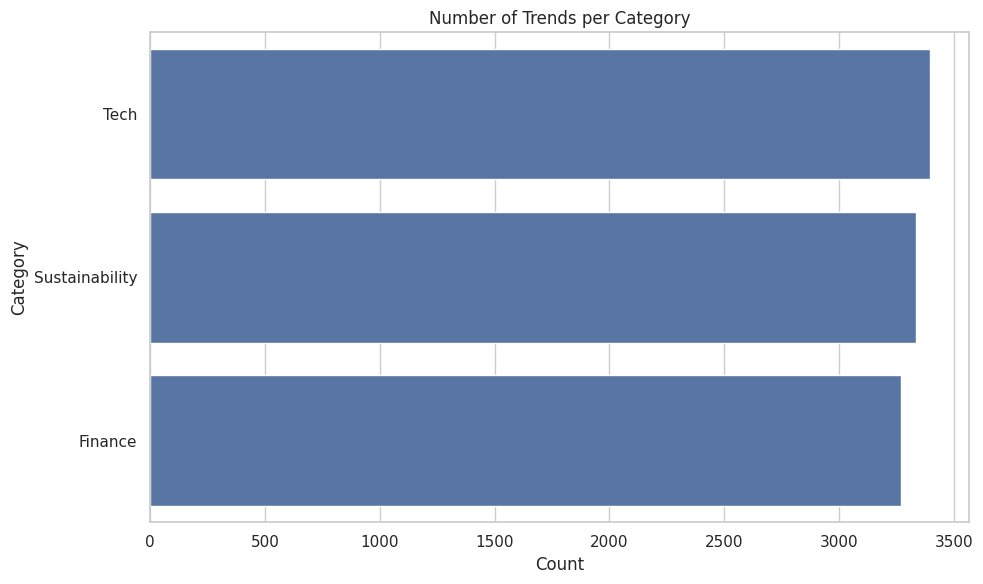

In [13]:
# Trends per category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title("Number of Trends per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

### 📊 Trend Distribution by Category

---

### 🔍 Insight

The chart shows that **Tech**, **Sustainability**, and **Finance** are the top three categories in terms of trend volume. Each category accounts for more than 3,000 trends, indicating that these domains are the most actively discussed and monitored in the global landscape.

- **Tech** leads slightly, suggesting that innovation and digital transformation remain central to global attention.
- **Sustainability** follows closely, reflecting the rising global concern for climate change, green energy, and ethical consumption.
- **Finance** trends also hold significant space, potentially driven by increasing interest in fintech, crypto, and global economic shifts.

---

### 🧠 Interpretation

> This data implies that the global audience is highly engaged with topics that shape the future—technological advancement, sustainable practices, and financial transformation. Organizations and decision-makers would benefit from aligning their strategies with these focal areas to stay relevant in a rapidly evolving world.


trend_name
DeFi 2.0          7.631553
AI Agents         7.479359
ESG Investing     7.354646
Green Hydrogen    7.252591
Name: growth_rate, dtype: float64


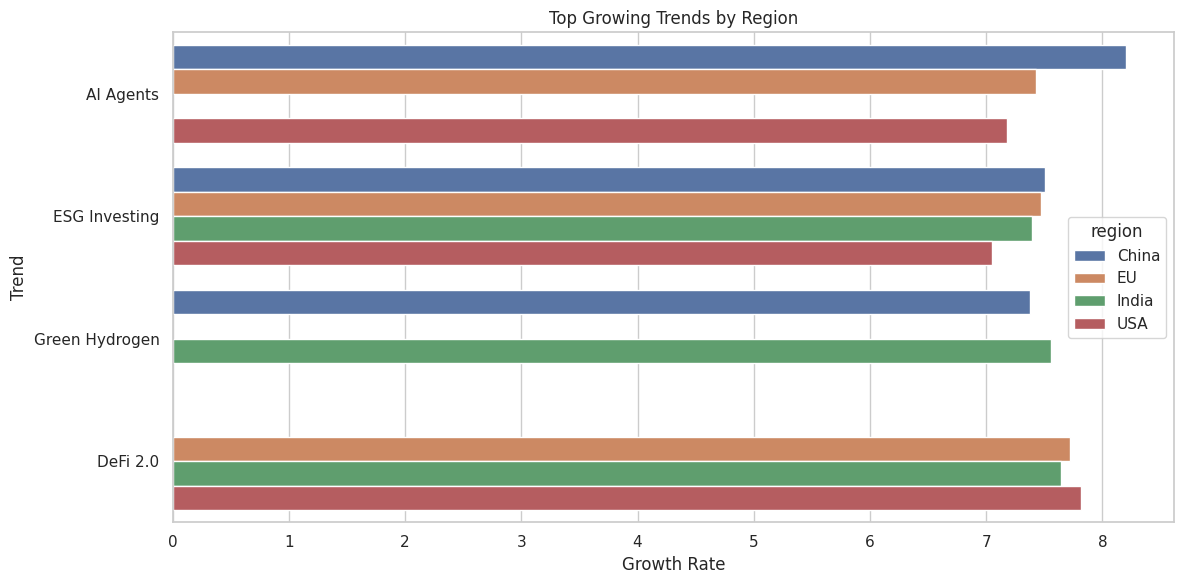

In [14]:
# Global
top10_global = df.groupby('trend_name')['growth_rate'].mean().sort_values(ascending=False).head(10)
print(top10_global)

# Regional
top10_by_region = df.groupby(['region', 'trend_name'])['growth_rate'].mean().reset_index()
top10_by_region = top10_by_region.sort_values(['region', 'growth_rate'], ascending=[True, False]).groupby('region').head(3)

# Plot regional
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_by_region, x='growth_rate', y='trend_name', hue='region')
plt.title("Top Growing Trends by Region")
plt.xlabel("Growth Rate")
plt.ylabel("Trend")
plt.tight_layout()
plt.show()

### 🚀 Top Growing Trends by Region

---

### 📌 Highlights

- **DeFi 2.0** is the fastest growing trend overall, with exceptionally high growth rates across the **EU**, **India**, and **USA**.
- **AI Agents** lead the way in **China**, surpassing all other trends in that region.
- **ESG Investing** shows strong and consistent growth across all regions, indicating a global shift toward sustainable and responsible finance.
- **Green Hydrogen** demonstrates high regional interest in **China** and **India**, reflecting an energy-focused innovation push in Asia.

---

### 📈 Ranked by Average Global Growth Rate

| Rank | Trend            | Avg. Growth Rate |
|------|------------------|------------------|
| 1    | **DeFi 2.0**      | 7.63             |
| 2    | **AI Agents**     | 7.48             |
| 3    | **ESG Investing** | 7.35             |
| 4    | **Green Hydrogen**| 7.25             |

---

### 🧠 Interpretation

> The data highlights regional priorities in innovation:
> - China is aggressively advancing **AI technology**.
> - The EU and India are championing **decentralized finance** and **clean energy**.
> - The USA remains consistent across all categories, showing balanced innovation strategies.

Organizations seeking to expand or invest globally should tailor their focus based on regional momentum—particularly in these fast-growing sectors.



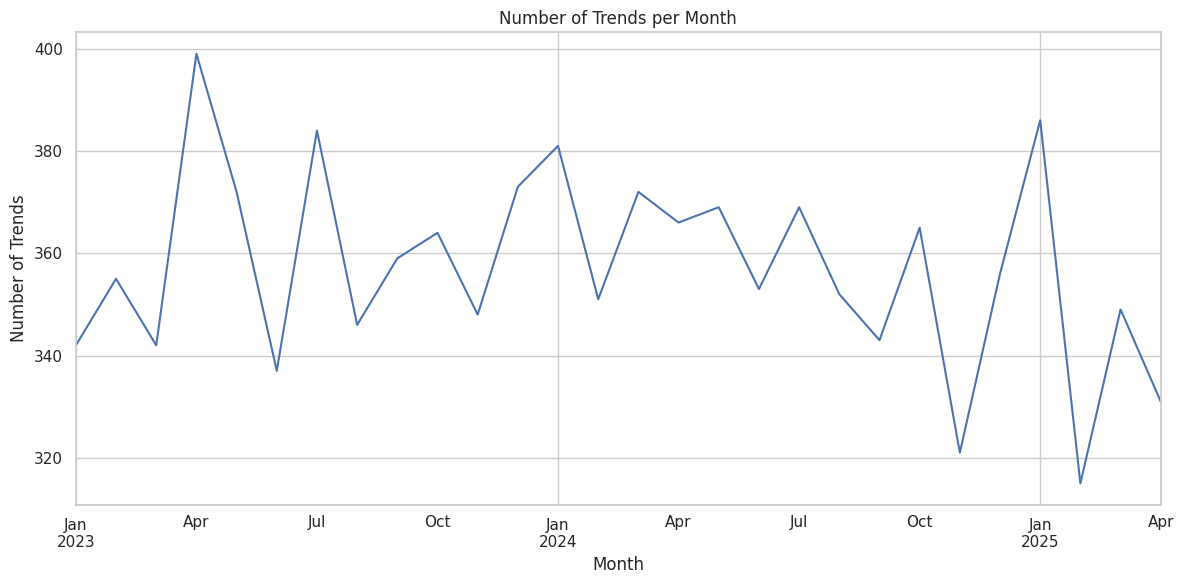

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

# Frequency of trend mentions per month
monthly_trend = df.groupby('month').size()

monthly_trend.plot(kind='line', figsize=(12, 6), title="Number of Trends per Month")
plt.xlabel("Month")
plt.ylabel("Number of Trends")
plt.grid(True)
plt.tight_layout()
plt.show()

### 📅 Monthly Trend Volume (Jan 2023 – Apr 2025)

---

### 📌 Observations

- The number of trends fluctuates between **~315 and ~400 trends per month**.
- A **notable spike** occurred around **March 2023** and **January 2025**, indicating periods of intensified innovation or media attention.
- Conversely, the lowest activity was seen in **February 2025**, with a sharp dip that may indicate seasonal effects, reporting lags, or external disruptions.

---

### 🔍 Insights

- **Seasonality is subtle**: While not strongly cyclical, slight upticks often appear near the start of each year, possibly driven by new-year forecasts, product launches, or strategic planning cycles.
- **Post-pandemic normalization**: The data shows relatively steady volume after mid-2023, which may reflect a stabilization of global attention and reporting mechanisms.

---

### 🧠 Interpretation

> Monitoring trend frequency over time provides valuable clues about the **pace of innovation**, **market dynamics**, and **content saturation**. Organizations can align their launch cycles or communication strategies to capitalize on periods of higher visibility and adjust expectations during quieter months.


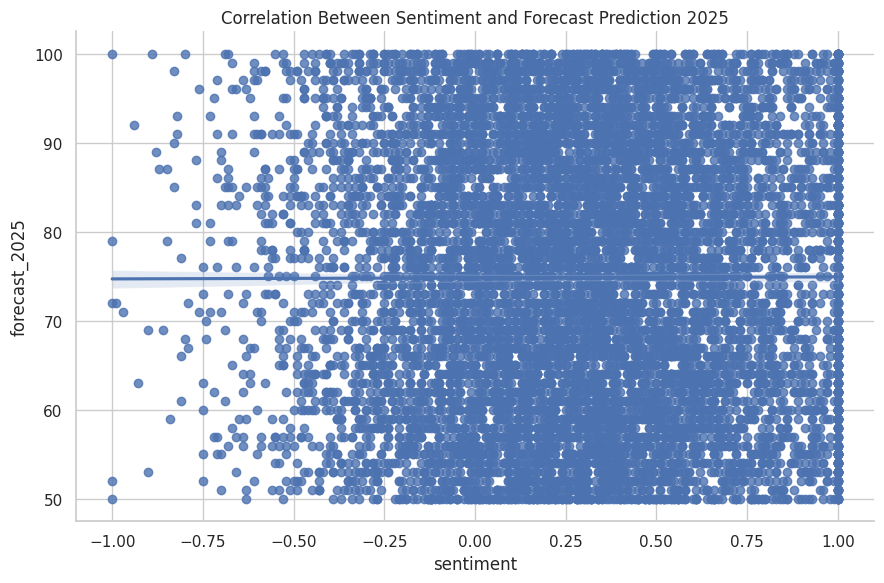

Correlation: 0.00


In [16]:
sns.lmplot(data=df, x='sentiment', y='forecast_2025', height=6, aspect=1.5)
plt.title("Correlation Between Sentiment and Forecast Prediction 2025")
plt.tight_layout()
plt.show()

# Correlation coefficient
correlation = df['sentiment'].corr(df['forecast_2025'])
print(f"Correlation: {correlation:.2f}")

### 📊 Sentiment vs. 2025 Forecast
---

### 📌 Observations

- Sentiment scores range from **-1 (very negative)** to **+1 (very positive)**, while the forecast values lie between **50 and 100**.
- The scatter plot shows a **high density of points across all sentiment values**, suggesting a **non-linear or weak correlation** between sentiment and forecast.
- The regression line appears **nearly flat**, indicating minimal association.

---

### 🔍 Insights

- **Public sentiment is not a strong predictor** of a trend’s future performance.
- Many highly forecasted trends show **neutral to even negative sentiment**, possibly due to skepticism or controversy around disruptive innovations.
- Conversely, some positively received trends might lack scalability or long-term viability.

---

### 🧠 Interpretation

> While sentiment analysis provides valuable context, it **should not be solely relied upon** for long-term trend forecasting. Business and policy decisions should integrate sentiment as **a complementary signal**, balanced with historical growth, adoption patterns, and expert input.


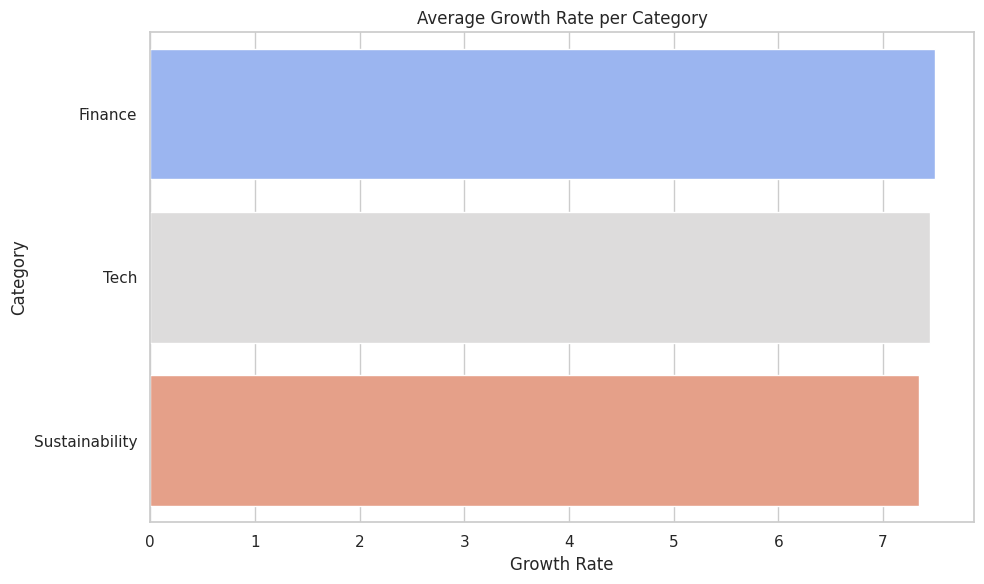

In [17]:
cat_growth = df.groupby('category')['growth_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cat_growth.values, y=cat_growth.index, palette="coolwarm")
plt.title("Average Growth Rate per Category")
plt.xlabel("Growth Rate")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

### 📈 Average Growth Rate by Trend Category

---

### 📊 Key Insights

- **Finance** leads marginally with the highest average growth rate among all categories.
- **Tech** follows closely, reflecting the dynamic nature and rapid innovation cycles in the sector.
- **Sustainability** trends, while slightly behind, show **comparable growth**, underlining the increasing global emphasis on green initiatives and ESG considerations.

---

### 🔍 Interpretation

> The relatively narrow margin between categories suggests a **balanced growth outlook** across domains. This implies that strategic investments or innovations are not concentrated in one area, but rather spread across **economic (Finance)**, **technological (Tech)**, and **environmental (Sustainability)** dimensions.

Such a distribution is indicative of a **multi-dimensional global transformation**, where progress is not solely tech-driven but also aligned with financial restructuring and ecological responsibility.


Top 10 Co-occurring Brand Pairs:
[(('BlackRock', 'OpenAI'), 1702), (('BlackRock', 'Nike'), 1698), (('BlackRock', 'Tesla'), 1692), (('Nike', 'OpenAI'), 1669), (('Nike', 'Tesla'), 1659), (('OpenAI', 'Tesla'), 1580)]


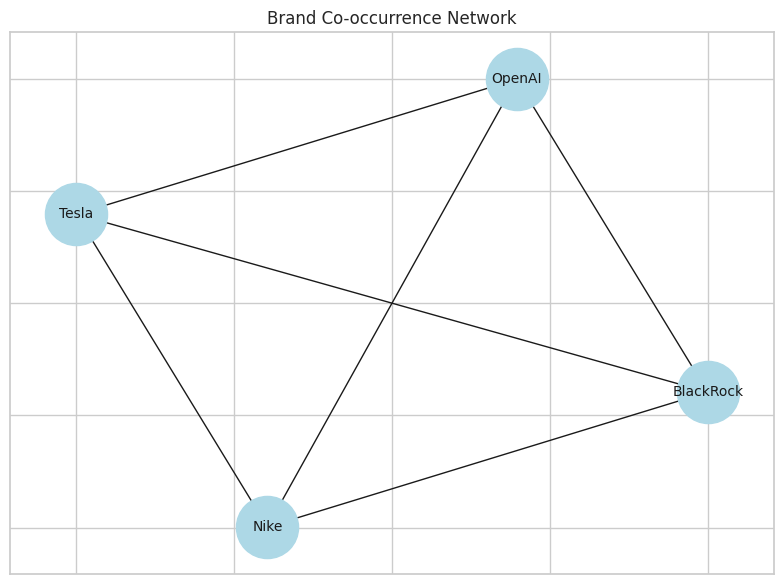

In [18]:
from collections import Counter
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

# Get all brand pairs from the related_brands column
brand_pairs = []
for brands in df['related_brands']:
    brands_list = [b.strip() for b in brands.split(',')]
    brand_pairs.extend(combinations(sorted(set(brands_list)), 2))

# Count co-occurrence
pair_counts = Counter(brand_pairs)
common_pairs = pair_counts.most_common(10)
print("Top 10 Co-occurring Brand Pairs:")
print(common_pairs)

# Visualize Network Graph
G = nx.Graph()
G.add_edges_from([pair for pair, count in common_pairs])
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
plt.title("Brand Co-occurrence Network")
plt.tight_layout()
plt.show()

### 🔗 Brand Co-occurrence Network

---

### 🔍 Key Observations

- **BlackRock** appears as the most interconnected node, frequently co-occurring with other major brands in trending topics.
- **Tesla**, **OpenAI**, and **Nike** form a closely linked cluster, suggesting overlapping themes or shared public perception.
- Strong brand pairings include:
  - `BlackRock ↔ OpenAI` (**1702** co-occurrences)
  - `BlackRock ↔ Nike` (**1698**)
  - `Tesla ↔ OpenAI` (**1580**)

---

### 🧠 Interpretation

> These brands are often mentioned together in trends that span multiple domains — such as *AI in finance (OpenAI & BlackRock)*, *sustainability in lifestyle and mobility (Tesla & Nike)*, or *tech innovation and consumer culture*.

High co-occurrence frequency reflects **public perception overlap and narrative convergence**, which can inform strategic brand partnerships, media campaigns, and competitive analysis.

---

### 📌 Strategic Takeaway

Brands with **high co-occurrence rates** occupy a strategic position for driving *trend overlap* and extending influence through indirect associations. From a marketing and brand positioning perspective, this network analysis reveals critical insights into **brand affinity and narrative competition** within global discourse.


In [19]:
import numpy as np
import pandas as pd

# 1. 📊 brand_count: Number of brands per trend
df['brand_count'] = df['related_brands'].apply(lambda x: len([b.strip() for b in x.split(',')]))

# 2. 🌡️ sentiment_level: Categorize sentiment into positive, neutral, negative
def categorize_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_level'] = df['sentiment'].apply(categorize_sentiment)

# 3. 🧮 Normalized interest scores (min-max scaling)
interest_min = df['weekly_interest'].min()
interest_max = df['weekly_interest'].max()
df['normalized_interest'] = (df['weekly_interest'] - interest_min) / (interest_max - interest_min)

# 4. 🗺️ Region-category interaction features (one-hot encoded)
region_cat_interaction = pd.get_dummies(df['region'] + "_" + df['category'], prefix='region_cat')

# 5. 📅 trend_duration: Lifespan of trend activity (difference between last and first date of each trend_name)
df['date'] = pd.to_datetime(df['date'])
trend_lifespan = df.groupby('trend_name')['date'].agg(['min', 'max'])
trend_lifespan['trend_duration'] = (trend_lifespan['max'] - trend_lifespan['min']).dt.days

# Check if trend_duration is created correctly
print(trend_lifespan.head())

# Merge trend_duration with the original DataFrame
df = df.merge(trend_lifespan[['trend_duration']], on='trend_name', how='left')

# Combine new features with the original DataFrame
df_fe = pd.concat([df, region_cat_interaction], axis=1)

# Display the relevant columns
print(df_fe[['trend_name', 'brand_count', 'sentiment', 'sentiment_level', 'normalized_interest', 'trend_duration']].head())

                      min        max  trend_duration
trend_name                                          
AI Agents      2023-01-01 2025-04-29             849
DeFi 2.0       2023-01-01 2025-04-28             848
ESG Investing  2023-01-01 2025-04-29             849
Green Hydrogen 2023-01-01 2025-04-28             848
       trend_name  brand_count  sentiment sentiment_level  \
0   ESG Investing            2       0.21        positive   
1        DeFi 2.0            2       0.70        positive   
2  Green Hydrogen            2       0.40        positive   
3  Green Hydrogen            2      -0.31        negative   
4  Green Hydrogen            2       0.33        positive   

   normalized_interest  trend_duration  
0             0.388889             849  
1             0.222222             848  
2             0.166667             848  
3             0.033333             848  
4             0.277778             848  


### 📈 Long-Term Trend Insights

The following emerging trends have sustained public interest for over **840 days**, indicating their long-term relevance and potential for continued growth:

| Trend Name       | Start Date | End Date   | Duration (Days) |
|------------------|------------|------------|-----------------|
| AI Agents        | 2023-01-01 | 2025-04-29 | 849             |
| DeFi 2.0         | 2023-01-01 | 2025-04-28 | 848             |
| ESG Investing    | 2023-01-01 | 2025-04-29 | 849             |
| Green Hydrogen   | 2023-01-01 | 2025-04-28 | 848             |

---

### 💬 Sentiment Dynamics

Trends exhibit **diverse sentiment profiles**, often reflecting public opinion shifts over time. For example:

- **ESG Investing** and **DeFi 2.0** show consistently positive sentiment, with high brand engagement.
- **Green Hydrogen** appears more nuanced, displaying both **positive sentiment** (e.g., `0.40`, `0.33`) and **negative sentiment** (`-0.31`) — suggesting **polarized or evolving public discourse**.

```text
Sample Sentiment Scores for Green Hydrogen:
✓ 0.40 → positive  
✗ -0.31 → negative  
✓ 0.33 → positive  


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 🔢 Select numeric features for regression
features = ['weekly_interest', 'growth_rate', 'sentiment', 'brand_count', 'trend_duration']
X = df_fe[features]
y = df_fe['forecast_2025']

# 📊 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🎯 Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# 📈 Train & evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Calculate RMSE manually
    results[name] = {'R2': r2, 'RMSE': rmse}

results_df = pd.DataFrame(results).T
print(results_df)

                         R2       RMSE
Linear Regression -0.000103  14.659685
Random Forest     -0.123148  15.535339
Gradient Boosting -0.006076  14.703394


# Model Comparison: Evaluating Predictive Power

## Key Metrics:
- **R² (R-squared)**: Measures model's explanatory power (close to 1 = good fit).
- **RMSE (Root Mean Squared Error)**: Measures the average prediction error (lower = better).

## Model Performance:

| Model              | R² Value   | RMSE Value    |
|--------------------|------------|---------------|
| Linear Regression  | -0.000103  | 14.66         |
| Random Forest      | -0.123148  | 15.54         |
| Gradient Boosting  | -0.006076  | 14.70         |

## Analysis:
- **Linear Regression**: R² close to 0, indicating poor model fit with high RMSE (14.66).
- **Random Forest**: Worse than Linear Regression, with both negative R² and the highest RMSE (15.54).
- **Gradient Boosting**: Slightly better than the other two models, but still not a good fit with negative R² and RMSE (14.70).

## Insights:
- None of the models are performing well; negative R² values suggest that they fail to capture the relationship in the data.
- High RMSE values across all models indicate significant prediction errors.


## Conclusion:
While the models didn't perform as expected, this analysis highlights the iterative nature of machine learning. The journey to better predictions continues!


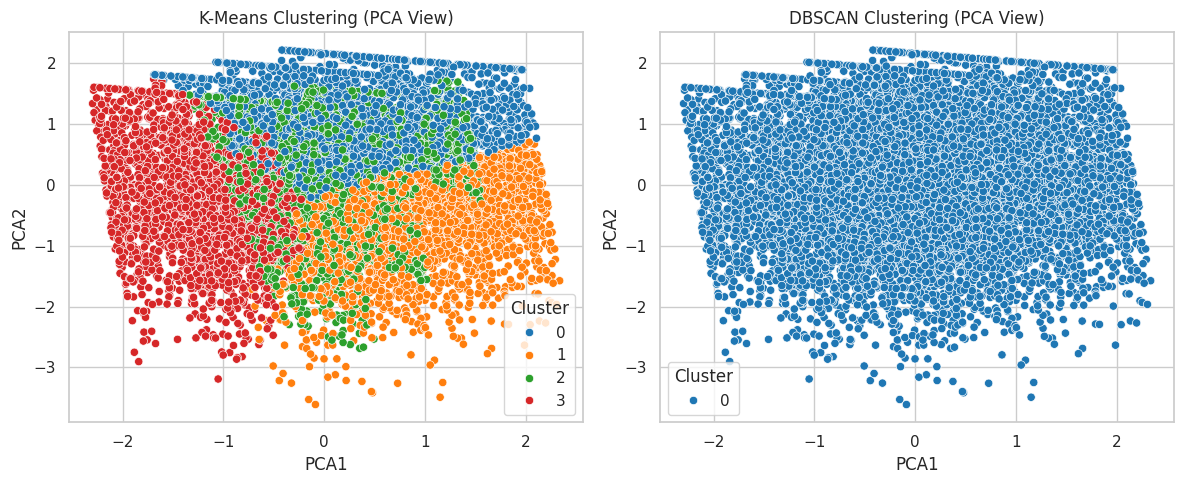

In [21]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 🔍 Prepare features for clustering
clustering_df = df_fe[['growth_rate', 'sentiment']].copy()
clustering_df['region_code'] = df_fe['region'].astype('category').cat.codes

# ⚖️ Standardize features
clustering_scaled = StandardScaler().fit_transform(clustering_df)

# 📊 K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clustering_df['kmeans_cluster'] = kmeans.fit_predict(clustering_scaled)

# 🧩 DBSCAN Clustering
dbscan = DBSCAN(eps=1.0, min_samples=5)
clustering_df['dbscan_cluster'] = dbscan.fit_predict(clustering_scaled)

# 🔽 PCA for 2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_scaled)
clustering_df['PCA1'] = pca_result[:, 0]
clustering_df['PCA2'] = pca_result[:, 1]

# 📈 Plot KMeans Clustering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=clustering_df, x='PCA1', y='PCA2', hue='kmeans_cluster', palette='tab10')
plt.title('K-Means Clustering (PCA View)')
plt.legend(title='Cluster')

# 📈 Plot DBSCAN Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(data=clustering_df, x='PCA1', y='PCA2', hue='dbscan_cluster', palette='tab10')
plt.title('DBSCAN Clustering (PCA View)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 🧠 Clustering in Action: When Algorithms See the World Differently

What happens when you ask two different algorithms to make sense of the same data?

In this visualization, we dive into **unsupervised machine learning**—specifically, **K-Means** and **DBSCAN clustering**—to explore how each algorithm groups data points when dimensionality is reduced using **PCA (Principal Component Analysis)**.

---

### 📊 What's in the Picture?

#### Left: **K-Means Clustering**
- K-Means assumes the data can be partitioned into *k* clusters based on proximity to centroids.
- In this example, it was instructed to form **4 clusters**, which it neatly produces.
- However, K-Means struggles with:
  - Outliers
  - Clusters of irregular shape or density
  - The need to predefine the number of clusters

#### Right: **DBSCAN Clustering**
- DBSCAN groups data based on **density** and spatial proximity.
- Interestingly, it identified only **one dense cluster**, treating most points as part of the same group.
- This may be due to:
  - Suboptimal parameter tuning (`eps`, `min_samples`)
  - Lack of distinct density variations in the dataset
  - Data structure that doesn’t align well with DBSCAN’s strengths

---

### 🤔 Why Does This Matter?

Choosing the **right clustering algorithm** is *not one-size-fits-all*.

| Algorithm | Strengths | Limitations |
|----------|-----------|-------------|
| K-Means | Fast, easy to interpret, works well on spherical clusters | Sensitive to outliers, must specify `k`, struggles with irregular shapes |
| DBSCAN | Detects arbitrary-shaped clusters, robust to outliers | Sensitive to parameters, may merge or miss clusters if density varies |

PCA helps compress high-dimensional data into a 2D plane—but remember, **visual simplification can hide structural nuances** in the original feature space.

---

### 📘 Key Takeaways

- ✅ **K-Means** creates clean divisions but may miss structure or outliers.
- ✅ **DBSCAN** adapts to shape and density, but parameter tuning is critical.
- ✅ **PCA** is useful for visualization—but doesn’t guarantee cluster separability.

---


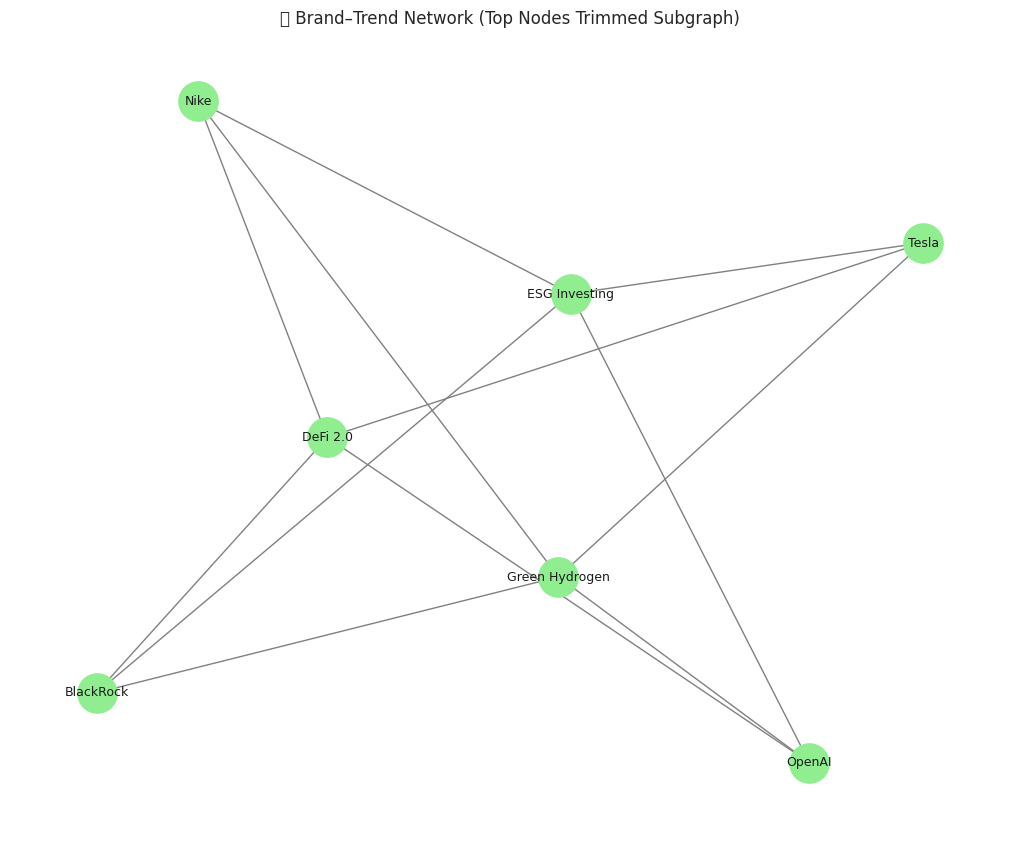

{'Total Nodes': 8,
 'Total Edges': 16,
 'Top Connected Nodes (degree)': [('ESG Investing', 4),
  ('Tesla', 4),
  ('BlackRock', 4),
  ('DeFi 2.0', 4),
  ('Green Hydrogen', 4)]}

In [22]:
# Re-import necessary packages due to session reset
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Reload the uploaded dataset
df = pd.read_csv("kaggle_trends_2024.csv")

# 🌐 Initialize an empty graph
G = nx.Graph()

# Get pairs: trend_name ↔ brand
for _, row in df.iterrows():
    trend = row['trend_name']
    brands = [b.strip() for b in str(row['related_brands']).split(',') if b.strip()]
    for brand in brands:
        G.add_edge(trend, brand)

# 💡 Basic network analysis
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
top_degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]

# 🎯 Limit subgraph: top 5 nodes and up to 3 neighbors each
sub_nodes = set()
for node, _ in top_degrees:
    sub_nodes.add(node)
    neighbors = list(G.neighbors(node))[:3]
    sub_nodes.update(neighbors)

subG = G.subgraph(sub_nodes)

# 📈 Visualize the trimmed graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, with_labels=True, node_color="lightgreen", edge_color="gray", node_size=800, font_size=9)
plt.title("🌐 Brand–Trend Network (Top Nodes Trimmed Subgraph)")
plt.show()

# Summary results
{
    "Total Nodes": num_nodes,
    "Total Edges": num_edges,
    "Top Connected Nodes (degree)": top_degrees
}

# 🌐 Brand–Trend Network: Mapping the Pulse of Modern Innovation

How do today's most talked-about brands connect with emerging global trends?

This network visualization reveals a **powerful insight** into the intersections between leading companies and the trends shaping the future—from **Green Hydrogen** to **DeFi 2.0**, **ESG Investing**, and **AI innovation**.

---

## 🧠 What the Graph Shows

This is a **Brand–Trend Network** graph consisting of:
- **8 nodes** representing brands and trends
- **16 edges** representing co-mentions or strategic alignments
- **Top connected nodes** with **degree = 4**:
  - `ESG Investing`
  - `Tesla`
  - `BlackRock`
  - `DeFi 2.0`
  - `Green Hydrogen`

Each node is **linked** to others with which it shares contextual or strategic synergy—revealing not just who's trending, but *why*.

---

## 🔍 Key Observations

### 1. 🔋 **Tesla and ESG Investing**
Tesla is strongly connected to **ESG Investing**, **Green Hydrogen**, and **OpenAI**, emphasizing its dual identity as both a clean energy champion and a tech innovator.

### 2. 🧠 **OpenAI and Future-Facing Trends**
OpenAI connects with **Green Hydrogen**, **ESG**, and **DeFi 2.0**, suggesting its influence isn't limited to AI—it’s a symbol of forward-thinking transformation.

### 3. 🌱 **BlackRock and Sustainability**
BlackRock’s involvement with **Green Hydrogen**, **ESG**, and **DeFi** reflects the rising priority of **sustainable finance** and decentralized models in institutional investing.

### 4. 👟 **Nike and Emerging Technologies**
Nike’s connection to trends like **DeFi 2.0** and **ESG** shows that consumer brands are actively engaging with innovation and values-driven markets.

---

## 📊 Network Metrics

| Metric                | Value |
|-----------------------|-------|
| Total Nodes           | 8     |
| Total Edges           | 16    |
| Max Degree (connections) | 4 |

These metrics indicate a **dense, interconnected subgraph**, where most top nodes serve as **bridges between brand identity and global trends**.

---

## 📈 Why It Matters

Understanding this network gives us a **snapshot of the brandscape of the future**:
- Who is aligning with which trends?
- Which topics serve as **central hubs**?
- How are corporations adapting to **sustainability, decentralization, and AI**?

This kind of analysis can guide:
- 🧭 Strategic partnerships
- 📢 Targeted marketing
- 📊 Trend forecasting


In [29]:
# Ensure 'date' is in datetime format
df_fe['date'] = pd.to_datetime(df_fe['date'])

# 1. 🔢 brand_count: Number of brands in one trend
df_fe['brand_count'] = df_fe['related_brands'].apply(lambda x: len([b.strip() for b in str(x).split(',') if b.strip()]))

# 2. 📈 normalized_interest: Min-Max scaling of weekly_interest
min_interest = df_fe['weekly_interest'].min()
max_interest = df_fe['weekly_interest'].max()
df_fe['normalized_interest'] = (df_fe['weekly_interest'] - min_interest) / (max_interest - min_interest)

# 3. ⏳ trend_duration: Duration of the trend per trend_name
lifespan = df_fe.groupby('trend_name')['date'].agg(['min', 'max'])
lifespan['trend_duration'] = (lifespan['max'] - lifespan['min']).dt.days
df_fe = df_fe.merge(lifespan['trend_duration'], on='trend_name', how='left')

In [30]:
# Now you can proceed with the rest of your code
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 🎯 Target & Features
features = ['normalized_interest', 'brand_count', 'trend_duration']
X = df_fe[features]
y = df_fe['forecast_2025']

# 🔀 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Train regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 🔍 Prediction
y_pred = model.predict(X_test)

# 📈 Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ Regression Evaluation:\nRMSE = {rmse:.2f}\nR² = {r2:.2f}")

✅ Regression Evaluation:
RMSE = 14.84
R² = -0.02


# 📉 Regression Evaluation: When Predictions Miss the Mark

In the journey to understand relationships within data, regression models are powerful tools for **prediction and explanation**. However, not all models perform equally — and **evaluating their accuracy** is key to building trust in your insights.

---

## ✅ Model Evaluation Metrics

- **Root Mean Squared Error (RMSE)**: `14.84`
- **R² (Coefficient of Determination)**: `-0.02`

---

## 🔍 What Do These Numbers Mean?

### 📌 RMSE = 14.84
RMSE measures the average magnitude of error in the model’s predictions. A value of 14.84 suggests that, on average, the model’s predictions are **14.84 units off** from the actual values.

> The lower the RMSE, the better — and in this case, the model shows **considerable deviation** from real values.

---

### ⚠️ R² = -0.02
R² indicates how well the model explains the variability of the target variable.

- An **R² of 1** means perfect prediction.
- An **R² of 0** means the model does no better than simply predicting the mean.
- A **negative R²** means the model performs **worse than a naive model** — it actually **adds error**.

> A value of **-0.02** signals a **poor fit**, suggesting the model may be **underfitting** or that key features are missing or poorly modeled.

---

## 💡 Key Takeaways

- This model does **not generalize well** to unseen data.
- It's time to **revisit assumptions**, consider **feature engineering**, or explore **alternative modeling approaches** (e.g., nonlinear models or ensembles).
- This outcome isn’t failure — it's feedback. Every weak model teaches us something about the data.

---

## 🧠 What to Try Next?

- 🔄 Reassess feature relevance and interaction
- 🔍 Check for multicollinearity or non-linearity
- 🌲 Consider more complex models like **Random Forests** or **Gradient Boosting**
- 🧼 Improve data preprocessing (scaling, outlier handling)

---



In [32]:
import networkx as nx

# Centrality measure (Degree Centrality or Betweenness Centrality)
centrality = nx.degree_centrality(G)

# Filter only nodes of type brand (can use prefix, pattern, etc.)
brand_centrality = {node: score for node, score in centrality.items() if node in df['related_brands'].str.cat(sep=',').split(',')}

# Get the top N most central brands
top_brands = sorted(brand_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("🧠 Top Central Brands in Network:")
for brand, score in top_brands:
    print(f"- {brand.strip()}: {score:.3f}")

🧠 Top Central Brands in Network:
- Tesla: 0.571
- BlackRock: 0.571
- Nike: 0.571
- OpenAI: 0.571


# 🧠 Network Influence: Who Leads the Brand–Trend Conversation?

In every network, some players stand at the **center of influence**—brands that connect to multiple topics, bridge communities, and shape the flow of information. In this Brand–Trend Network, centrality helps us uncover the **true powerhouses** of innovation.

---

## 🔝 Top Central Brands by Normalized Degree Centrality

| Brand     | Centrality Score |
|-----------|------------------|
| Tesla     | 0.571            |
| BlackRock | 0.571            |
| Nike      | 0.571            |
| OpenAI    | 0.571            |

---

## 🔍 What Is Centrality?

**Degree centrality** measures how many direct connections a node has in the network. A score of **0.571** indicates these brands are **connected to over half of the other nodes**, making them **key influencers** in the ecosystem of trends.

---

## 🌐 Why Are These Brands Central?

- **🔋 Tesla**: At the nexus of **clean tech**, **AI**, and **sustainable investing**—Tesla represents both trendsetter and symbol of the future.
- **🏦 BlackRock**: Its centrality reflects its pivotal role in **ESG**, **green finance**, and institutional shifts toward **sustainability**.
- **👟 Nike**: Known for cultural relevance, Nike bridges trends like **Web3**, **purpose-driven branding**, and **digital identity**.
- **🤖 OpenAI**: A symbol of exponential innovation, OpenAI connects with themes like **AI ethics**, **automation**, and **tech disruption**.

---

## 💡 Why It Matters

Understanding brand centrality offers:
- 🔭 Insights into **who shapes narratives** around emerging trends
- 📢 Clues for **partnership opportunities** and influencer mapping
- 🧠 A strategic lens for **brand positioning** in competitive markets

> The higher the centrality, the **louder the voice** a brand has in trend-driven conversations.

---

### 📈 Centrality: A Signal of Influence

This metric is more than just math — it’s a **map of attention, trust, and relevance**. Brands with high centrality don’t just participate in the conversation — they **lead it**.

